In [101]:
import nltk
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string
import os
import codecs
import json
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alevi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alevi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [102]:
# covert file of text to tokens and remove punctuation
def word_dataset(file):
    f = open(file, encoding="utf8")
    text = str(f.read())
    
    #remove punctuation
    table = str.maketrans(dict.fromkeys(string.punctuation))
    text = text.translate(table)
    text = text.replace('’', '')
    text = text.replace('”', '')
    text = text.replace('“', '')
    
    #tokenize text
    text = word_tokenize(text)
    return text


In [10]:
# remove stop words and does stemming to text
def stemming_stopwords_tokens(all_words):
    stop_words = set(stopwords.words('english'))
    
    # removes stop words
    filtered_sentence = [w for w in all_words if not w.lower() in stop_words]
    
    ps = PorterStemmer()
    stemmed_sentence = []
    
    # stemming to text
    for w in filtered_sentence:
        x = ps.stem(w)
        stemmed_sentence.append(x)
    
    return stemmed_sentence
    

In [11]:
#counts frequency of words return dict of key words and value frequency
def count_frequency_words(word_list):
    count_text = {}

    #count words
    for word in word_list:
        if word not in count_text:
            count_text.update({i:1})
        else:
            count_text[i] += 1
    
    return count_text



In [12]:
# union list of word to text
def list_to_text(word_list):
    all_text = ''
    for word in word_list:
        all_text += word+' '
        
    return all_text

In [13]:
# save json file
def save_json_file(filename,to_save):
    File_object = codecs.open(filename,"a", "utf-8")
    json.dump(to_save, File_object)
    File_object.close()


In [14]:
# save text file 
def save_text_file(filename,to_save):
    File_object = codecs.open(filename,"a", "utf-8")
    File_object.write(to_save)
    File_object.close()


In [15]:
# tag text with nltk tags
def pos_text(text):
    # tag text
    all_text_tokenize = word_tokenize(text)
    tagged = nltk.pos_tag(all_text_tokenize)
    
    return tagged 


In [16]:
# tags text and finds phrases 
def find_phrases(text):
    tagged = pos_text(text)
    phrase_list = []

    # find phrases
    for i in range(0,len(tagged)):
        if tagged[i][1] in 'JJ':
            prase = tagged[i][0]
            for j in range(i+1,len(tagged)):
                if tagged[j][1] in ('NNS','NN','NNP','NNPS','JJ'):
                    prase = prase + ' ' + tagged[j][0]
                else:
                    if prase != tagged[i][0]:
                        phrase_list.append(prase)

                    i = j
                    break
    return phrase_list

In [17]:
# count number of time phrase appers in text returns dict
def count_phrase(text, phrase_list):
    phrase_dict = {}
    
    for phrase in phrase_list:
        num_phrase = text.count(phrase)
        phrase_dict[phrase] = num_phrase
    
    return phrase_dict



In [18]:
# creates file for each speech with out stop words and with stemming and counting frequency
def create_file_stop_stem(directory, name_new_file):

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            all_words = word_dataset(directory+'\\'+filename)
            # first stem and stop and then count
            token_stem_stop = stemming_stopwords_tokens(all_words)
            dict_words = count_frequency_words(token_stem_stop)
        
            #save file
            save_json_file(name_new_file+filename, dict_words)


In [19]:
# creates file for each speech of as and counting frequency
def create_file_phrases(directory, name_new_file):

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            f = open(directory+'\\'+filename, encoding="utf8")
            text = str(f.read())

            phrase_list = find_phrases(text)
            phrase_dict = count_phrase(text, phrase_list)
            
            #save file
            save_json_file(name_new_file+filename, phrase_dict)
            


In [20]:
# creates text file for each speech with out stop words and with stemming
def create_file_stop_stem_text(directory, name_new_file):

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            all_words = word_dataset(directory+'\\'+filename)
            # first stem and stop and then count
            token_stem_stop = stemming_stopwords_tokens(all_words)
            text = list_to_text(token_stem_stop)
 
            #save file
            save_text_file(name_new_file+filename,text)


In [91]:
# count all words and print top 20 words of all speeches
def count_words_all_text(directory):

    all_text = ''
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            all_words = word_dataset(directory+'\\'+filename)
            stem_stop_text = stemming_stopwords_tokens(all_words)
            all_text += list_to_text(stem_stop_text)
    
    all_text = word_tokenize(all_text)    
    count_text = count_frequency_words(all_text)

    
    

In [70]:
# unions files based on year in the name of the file
def join_files_years(directory, save_file):
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            year = filename.replace(".txt",'')[(len(filename.replace(".txt",'')))-4:]            
            f = open(directory+'\\'+filename, encoding="utf8")
            text = str(f.read())
            
            # find all files with the same year
            for seconde_file in os.listdir(directory):
                year_check = seconde_file.replace(".txt",'')[(len(seconde_file.replace(".txt",'')))-4:]
                if year == year_check:
                    f = open(directory+'\\'+seconde_file, encoding="utf8")
                    text_add = str(f.read())
                    text += ' '+text_add
                    
            save_text_file(save_file+year+".txt",text)


In [37]:
# find phrases in file and saves in dict with number of frequncy
def find_phrases_and_count(filename, save_file, year):    
    f = open(filename, encoding="utf8")
    text = str(f.read())
    
    phrase_list = find_phrases(text)
    phrase_dict = count_phrase(text, phrase_list)
    
    save_json_file(save_file+year, phrase_dict)
  


In [36]:
# find phrases by years and saves in new file
def create_file_phrases_years(directory, save_file):
    for filename in os.listdir(directory):
        year = filename.split('.')
        find_phrases_and_count(directory+'\\'+filename, save_file, year[0])
        


In [67]:
# join all dicts to one dict 
def join_dicts(directory, save_file):
    dict_union = {}

    for filename in os.listdir(directory):
        with open(directory+'\\'+filename) as json_file:
            dict_data = json.load(json_file)
        list_data = dict_data.items()

        for phrase in list_data:
            if phrase[0] not in dict_union:
                dict_union[phrase[0]] = phrase[1]
            else:
                dict_union[phrase[0]] += phrase[1]
    
    save_json_file(save_file,dict_union)


In [43]:
# data for df, returns count of phrase by years and column and index for df
def top_phrases_years(directory, list_phrase):
    
    phrase_count_years = []
    data_list = []
    
    for filename in os.listdir(directory):
        with open(directory+'\\'+filename) as json_file:
            dict_data = json.load(json_file)
        count_list = [filename.replace('.txt','')]
        for phrase in list_phrase:
            if phrase[0] in dict_data:
                count_list.append(dict_data[phrase[0]])
            else:
                count_list.append(0)
        data_list.append(count_list)
    
    index_values = []
    for filename in os.listdir(directory):
        index_values.append(filename.replace('.txt',''))
    
    column_list = ['year']
    for phrase in list_phrase:
        column_list.append(phrase[0])
        
    
    return (data_list, index_values, column_list)
        

In [138]:
# phrase by years graph
def create_table_phrase_count(data_list, column_list):
    plt.rcParams["figure.figsize"] = (20,10)
    
    fig, ax = plt.subplots()
  
    loc = ticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
        
    plt.rcParams.update({'font.size': 8})
    df = pd.DataFrame(data_list, columns = column_list, dtype = int)
    #'small business', 'civil rights','economic growth','human rights','other nation','foreign policy','other countries','young people', 'nuclear weapons','Federal Government','other nations','fellow Americans'
    plt.plot( 'year', 'small business', data=df, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'year', 'nuclear weapons', data=df, color='yellow', linewidth=2)
    plt.plot( 'year', 'foreign policy', data=df, color='purple', linewidth=2)
    plt.plot( 'year', 'Federal Government', data=df, color='orange', linewidth=2)
    plt.plot( 'year', 'young people', data=df, color='gray', linewidth=2)
    plt.plot( 'year', 'human rights', data=df, color='red', linewidth=2)
    
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
    
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
    
#     leg = ax.legend()
#     leg = ax.legend(prop={"size":14})
    plt.xlabel("Years", fontsize=14)
    plt.ylabel("No. of phrase",fontsize=14)
    plt.title("Top Prases - Frequency by Years",fontsize=20)   
    # show legend
    plt.legend(prop={"size":14})

    # show graph
    plt.show()


In [124]:
# uses phrase file to build data for word cloud
def word_cloud_phrases(directory):
    
    phrase_list = []
    
    with open(directory) as json_file:
        dict_data = json.load(json_file)
    
    for phrase in dict_data:
        if dict_data[phrase] >= 5 :
            for i in range(0,dict_data[phrase]):
                phrase_list.append(phrase)
    
    return phrase_list
           

In [127]:
# find all nouns in text based on tagging the text
def word_cloud_nouns(directory):
    noun_list = []
    
    for filename in os.listdir(directory):
        words = word_dataset(directory+'\\'+filename)
        tagged = nltk.pos_tag(words)
        for i in tagged:
            if i[1] in ('NNP','NNPS'):
                noun_list.append(i[0])

    return noun_list 

In [125]:
# plot of word cloud
def graph_word_cloud(word_list, title):
    
    wordcloud = WordCloud(
                background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate((' '.join(word_list)))
    
    plt.imshow(wordcloud) # image show
    plt.axis('off') # to off the axis of x and y
    plt.title(title, fontsize=20)
    plt.show()


In [131]:
# plot for word rank 
def plot(dict):
    curr = []
    
    for val in dict.values():
        curr.append(val)
    curr = sorted(curr,  reverse=True)
    rank = list(range(len(curr)))
    
    fig, ax = plt.subplots()
    
    plt.loglog(rank, curr)
    
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
    
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
    plt.xlabel("Frequency of word", fontsize=14)
    plt.ylabel("Rank",fontsize=14)       
    plt.title("Word Rank by Frequency",fontsize=20)
    plt.show()


In [69]:
def create_files(directory_1, directory_2, directory_3, raw_years, phrases_years, top_phrases):
    join_files_years(directory_1, raw_years)
    
    create_file_phrases_years(directory_2, phrases_years)
    
    phrase_list = join_dicts(directory_3, top_phrases)



In [72]:
# democratic files
directory_1 = r'democratic\raw_files'
directory_2 = r'democratic\raw_years'
directory_3 = r'democratic\phrases_years'
raw_years = 'democratic/raw_years/'
phrases_years = 'democratic/phrases_years/'
top_phrases = 'democratic/top_phrases'

create_files(directory_1, directory_2, directory_3, raw_years, phrases_years, top_phrases)

In [75]:
# republican files
directory_1 = r'republican\raw_files'
directory_2 = r'republican\raw_years'
directory_3 = r'republican\phrases_years'
raw_years = 'republican/raw_years/'
phrases_years = 'republican/phrases_years/'
top_phrases = 'republican/top_phrases'

create_files(directory_1, directory_2, directory_3, raw_years, phrases_years, top_phrases)

In [32]:
# checks number of words in file and returns int
def count_words(directory):
    word_list = word_dataset(directory)    
    
    return len(word_list)
    

In [103]:
# creates df of number of words per year and returns list for graph
def count_by_years(directory):
    data_years = []
    data_index = []
    
    for filename in os.listdir(directory):    
        
        num_words = len(word_dataset(directory+'\\'+filename))
        data_years.append(num_words)
        data_index.append(filename.replace('.txt',''))
        
    return [data_years,data_index]

    

In [34]:
# graph of number of words per year from all speechs
def create_table_count_words(data,index_years):
    df = pd.DataFrame({'Count Words': data}, index = index_years,  dtype = int)
    df.plot(kind="bar")
                
    # show legend
    plt.legend()
    
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("No. of words",fontsize=14)
    plt.title("Number of words in Speeches per Year",fontsize=20)
    
    # show graph
    plt.show()


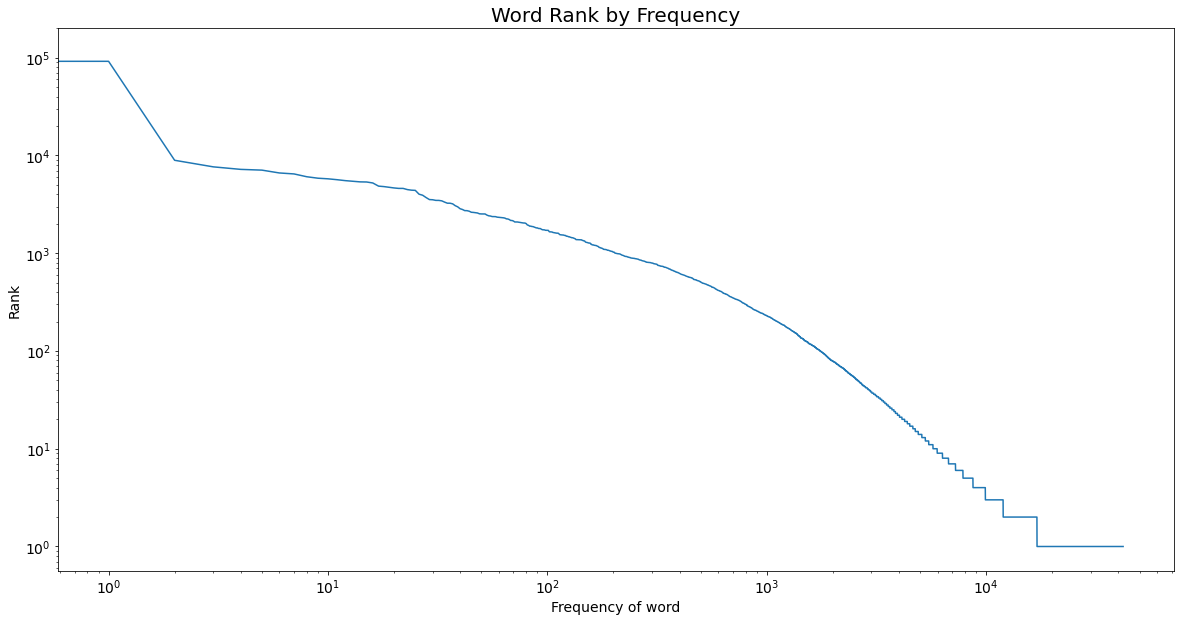

In [140]:
# frquncy of words from all text
def frquncy_check(directory):
    
    
    all_text = ''
    for filename in os.listdir(directory):
        f = open(directory+'\\'+filename, encoding="utf8")
        text = str(f.read())
        text = text.replace('’', '')
        text = text.replace('”', '')
        text = text.replace('“', '')
        all_text += ' '+text
    
    # text to tokens
    words = word_tokenize(all_text) 
    # remove stop words and does stemming to list of words
    count_words = stemming_stopwords_tokens(words) 
    
    count_text = {}

    # counts frequency of words
    for i in count_words:
        if i not in count_text:
            count_text.update({i:1})
        else:
            count_text[i] += 1

    plot(count_text)
    
directory = r'raw_files'
frquncy_check(directory)


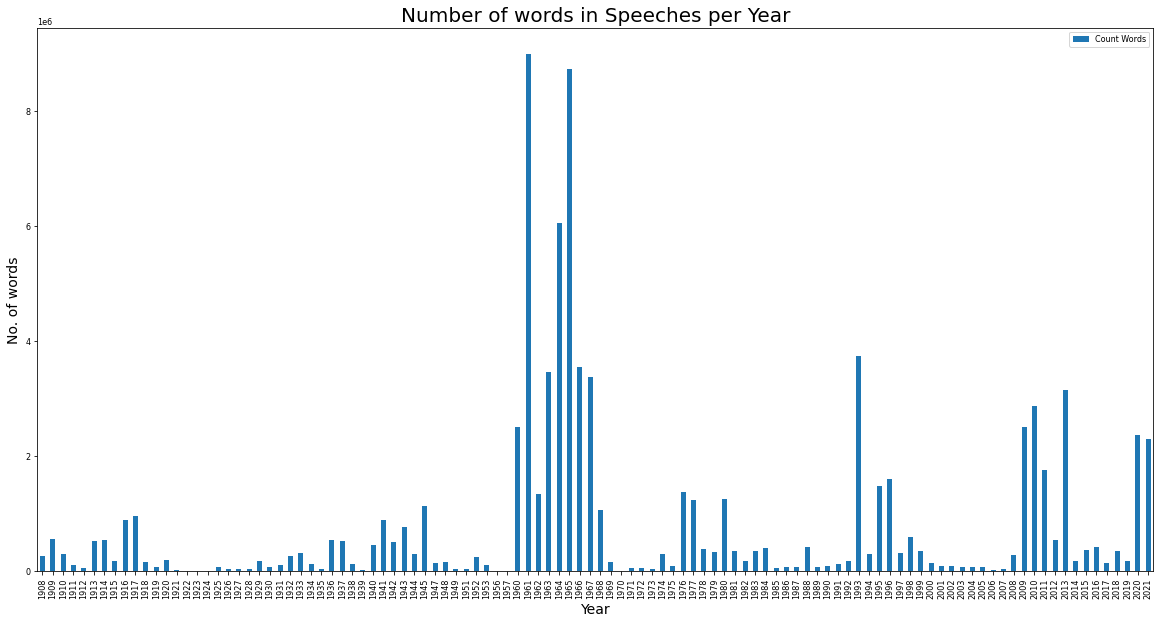

In [141]:
# count words by years
def frquncy_check_years(directory):
    
    #create df
    data = count_by_years(directory)
    
    # plot df
    create_table_count_words(data[0],data[1])

directory = r'raw_years'    
frquncy_check_years(directory)

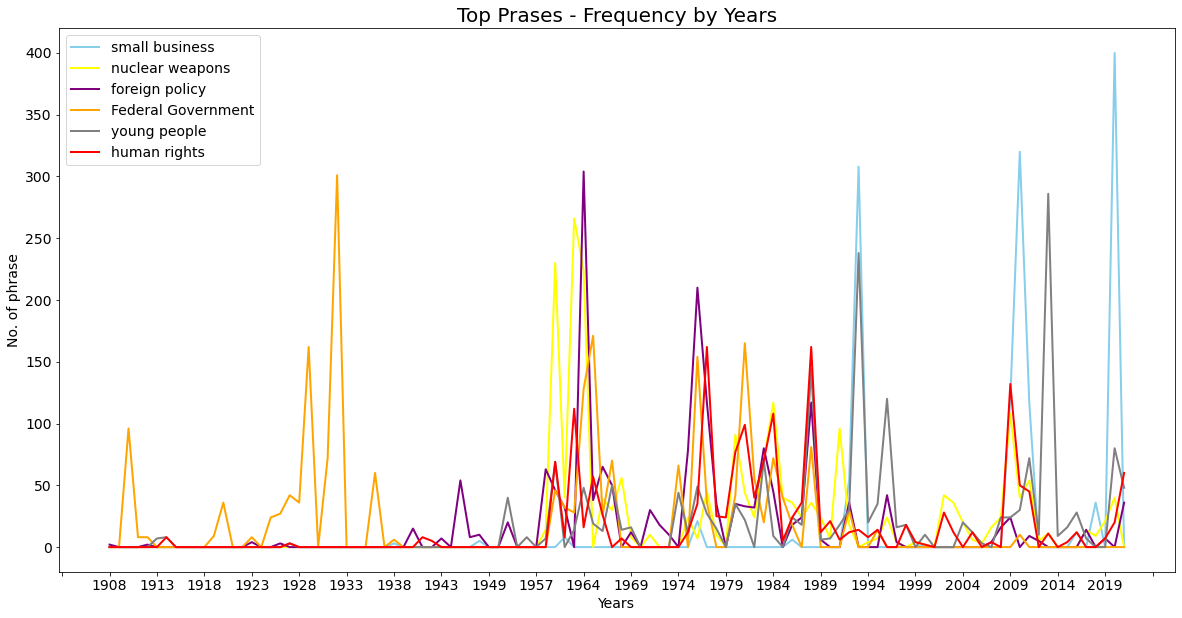

In [139]:
# phrase trends from top 20
def top_phrases_count_year_graph(directory):
    # open file with all phrases from text
    with open(directory) as json_file:
        dict_data = json.load(json_file)
        
    # sort dict of all phrases, to take top 20 phrases
    sorted_dict = {k: v for k, v in sorted(dict_data.items(), key=lambda item: item[1])}
    sorted_dict =  list(sorted_dict.items())
    
    # create df of top 20 phrases
    data_for_table = top_phrases_years(directory, sorted_dict[-20:])
    #plot df
    create_table_phrase_count(data_for_table[0], data_for_table[2])
    
    
directory = r'top_phrases'
top_phrases_count_year_graph(directory)



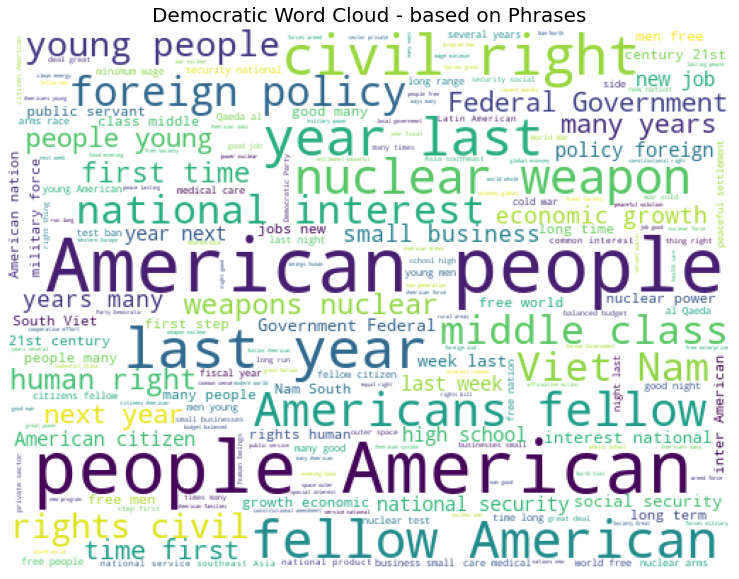

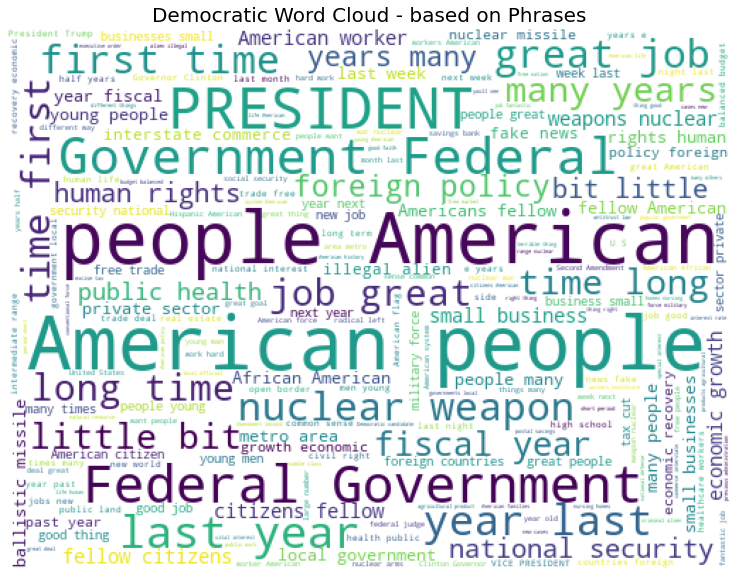

In [128]:
# word cloud phrases
def word_cloud_phrases_plot(directory, title):
    phrase_list = word_cloud_phrases(directory)
    graph_word_cloud(phrase_list, title)
    
# democratic phrases
directory_democratic = r'democratic\top_phrases'
title_democratic = 'Democratic Word Cloud - based on Phrases'
word_cloud_phrases_plot(directory_democratic, title_democratic)


# republican phrases
directory_republican = r'republican\top_phrases'
title_republican = 'Democratic Word Cloud - based on Phrases'
word_cloud_phrases_plot(directory_republican, title_republican)

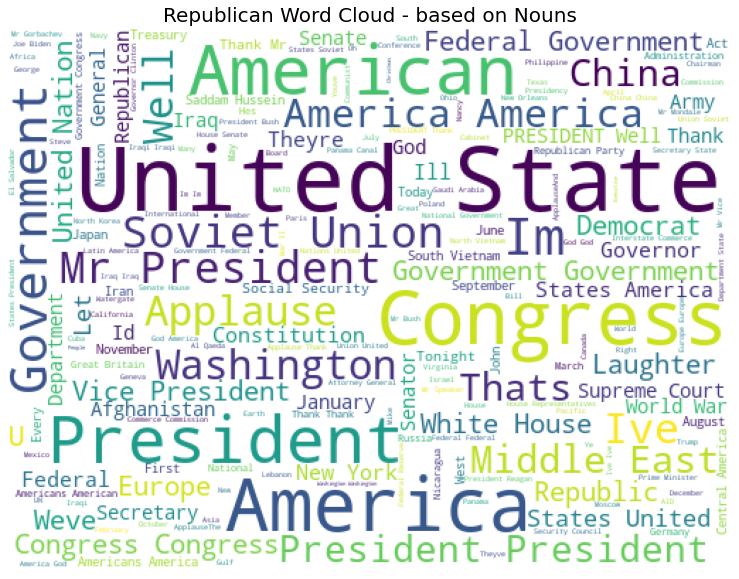

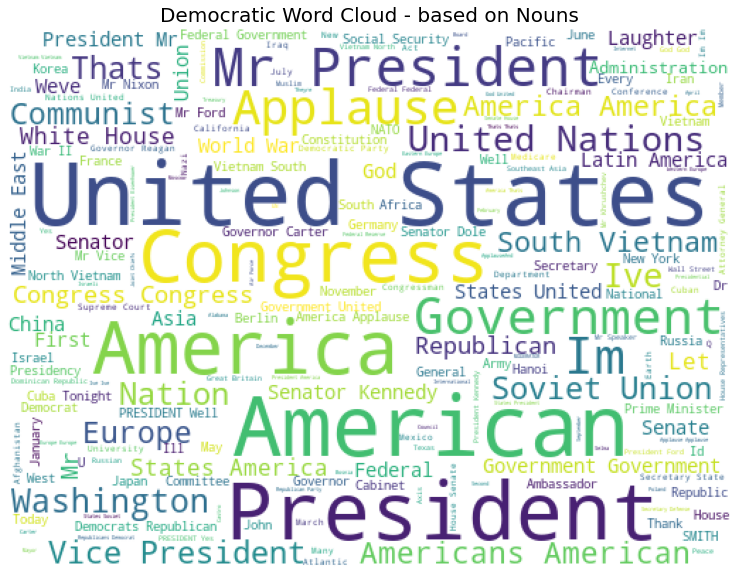

In [129]:
# word cloud phrases
def word_cloud_noun_plot(directory, title):
    phrase_list = word_cloud_nouns(directory)
    graph_word_cloud(phrase_list, title)
    

# republican phrases
directory_republican = r'republican\raw_files'
title_republican = 'Republican Word Cloud - based on Nouns'
word_cloud_noun_plot(directory_republican, title_republican)

# only words word cloud republican
directory_democratic = r'democratic\raw_files'
title_democratic = 'Democratic Word Cloud - based on Nouns'
word_cloud_noun_plot(directory_democratic, title_democratic)